Create a program to run the file on each of our computers. We are starting only with data from Missoula County.

In [1]:

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

path1 = r"C:\Users\annag\Documents\2018-2019\Spring_2019\BigDataProjects\flu-data-linear-regression\Mslaflu_1.csv"
path2 = "/home/mandub/Desktop/6th semester/courses/Data Science Projects/data flu/flu-data-linear-regression/Mslaflu_1.csv"
path3 = r"C:\Users\jakeo\OneDrive\Documents\M467\flu-data-linear-regression\Mslaflu_1.csv"
path4 = r"C:\Users\willi\Desktop\flu projrct\flu-data-linear-regression\Mslaflu_1.csv"



pathlist = [path1, path2, path3, path4]
names = ["Anna", "Mandub", "Jake", "Bill"]
for paths in range(len(pathlist)):
    try:
        with open(pathlist[paths]) as f:#, encoding = "utf-8"
            print ("This is", names[paths])   
            path = pathlist[paths]
    except:
        print("This is not", names[paths])

This is Anna
This is not Mandub
This is not Jake
This is not Bill


Get the data from the csv file and put it in a dictionary such that
keys = week
values = [count, county population, and rate]

In [7]:
MslaDict = defaultdict(list)
with open(path) as f:  #, encoding = "utf-8"
    next(f)         #skip the header
    for string in f:
        data = string.split(",")
        MslaDict[data[0]].append([data[1],data[2],data[3].rstrip()])

        
## printing keys and values in MslaDict dictionary     
#print(MslaDict)



Create a list of pairs from the data, such that week n+1 is paired with week n flu rate.

In [10]:
pair = []
for key in MslaDict.keys():
    if int(key) == 1:
        pair.append((0, float(MslaDict[key][0][2])))  #using a dummy zero for the first week
    else:
        pair.append((int(key)-1,float(MslaDict[key][0][2])))
#print(pair)

Goal 1: Create a plot of the flu rates over time for Missoula. Create a linear regression line to see if there is a linear realtion to the flu rates over time.

Try 1: Look at just the last year.

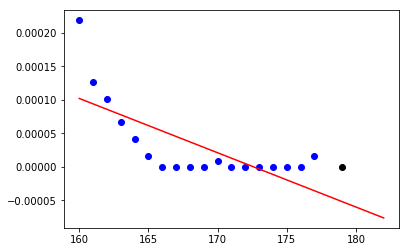

In [19]:
#Create our training and test data
x1=[]     #week number
y1=[]     #flu rate
for i in range(len(pair)):
    x1.append(pair[i][0])
    y1.append(pair[i][1])

#just looking at this year, so taking the last N weeks
N=1     #represents the number of weeks we are predicting
xTrain1 = x1[-20:-N-1] # here it will take only 20-N+1 numbers (20 weeks in a year)  
yTrain1 = y1[-20:-N-1] # here it will take only 20-N+1 numbers

xTest1 = x1[-N:]
yTest1 = y1[-N:]


slope, intercept, rvalue, pvalue,stderr =linregress(xTrain1,yTrain1)
xa = np.linspace(xTrain1[0],xTest1[-1]+3) # create the x-axis out three weeks more than our data to extrapolate
ya = intercept + slope*xa                  # linear regression line  
plt.plot(np.array(xTrain1),np.array(yTrain1),"bo")
plt.plot(np.array(xTest1),np.array(yTest1),"ko")
plt.plot(xa,ya,'-r')
plt.title = "Missoula Flu Rates"
plt.ylabel= "Flu Rates"
plt.xlabel =  "Weeks"
plt.show()

Try 2: Look at all of the data.

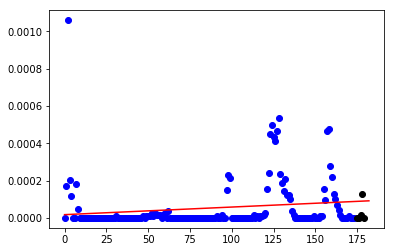

In [20]:
x1=[]     #week number
y1=[]     #flu rate
for i in range(len(pair)):
    x1.append(pair[i][0])
    y1.append(pair[i][1])

#just looking at all of the data, so taking the last N weeks as testing data
N=5
xTrain1 = x1[:-N-1] # here it will take everything except the N numbers   
yTrain1 = y1[:-N-1] # here it will take everything except the N numbers

xTest1 = x1[-N:]  #Last N weeks
yTest1 = y1[-N:]  #Last N weeks


slope, intercept, rvalue, pvalue,stderr =linregress(xTrain1,yTrain1)
xa = np.linspace(xTrain1[0],xTest1[-1]+3) # create the x-axis out three weeks more than our data to extrapolate
ya = intercept + slope*xa                  # linear regression line  
plt.plot(np.array(xTrain1),np.array(yTrain1),"bo")
plt.plot(np.array(xTest1),np.array(yTest1),"ko")
plt.plot(xa,ya,'-r')
plt.title = "Missoula Flu Rates"
plt.ylabel= "Flu Rates"
plt.xlabel =  "Weeks"
plt.show()

Goal 2: Create a scatter plot of the flu rates in realtion to the previous week's rate.

Try 1: Just this year's data.

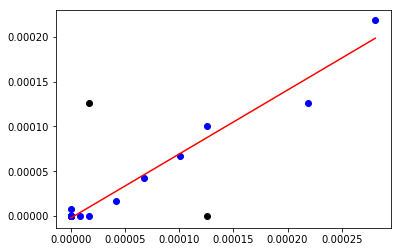

In [24]:
x2=[]    #x2 value is last weeks flu rate
y2=[]    #y2 vaalue is this weeks flue rate
for i in range(len(pair)-1):
    x2.append(pair[i][1])
    y2.append(pair[i+1][1])
    #print(x2[i],y2[i])
    

#just looking at this year, so taking the last N weeks for our prediction
N=2                    #represents the number of weeks we are predicting
xTrain2 = np.array(x2[-20:-N-1]) # here it will take only 20-N+1 numbers (20 weeks in a year)  
yTrain2 = np.array(y2[-20:-N-1]) # here it will take only 20-N+1 numbers

xTest2 = np.array(x2[-N:])
yTest2 = np.array(y2[-N:]) 

slope, intercept, rvalue, pvalue,stderr =linregress(xTrain2,yTrain2)
xb = np.linspace(np.amin(xTrain2),np.amax(xTrain2)) # an array from min of xTrain2 to max of xTrain2 to plot linear regression line
yb = intercept + slope*xb                  # regression line using values calulated from above
plt.plot(xTrain2, yTrain2,"bo")
plt.plot(xTest2, yTest2, "ko")
plt.plot(xb,yb,'-r')
plt.title = "Missoula Flu Rates"
plt.ylabel= "Flu Rates"
plt.xlabel =  "Previous Weeks Flu Rates"
plt.show()






Try 2: Look at all the data.

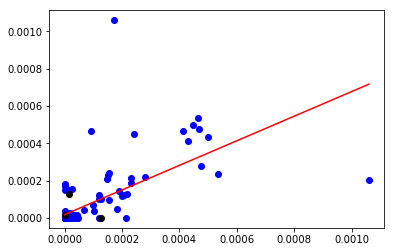

In [26]:
#Taking the last N weeks for our prediction
N=3                    #represents the number of weeks we are predicting
xTrain2 = np.array(x2[:-N-1]) # here it will take everything up to the last N weeks
yTrain2 = np.array(y2[:-N-1]) # here it will take everything up to the last N weeks

xTest2 = np.array(x2[-N:])
yTest2 = np.array(y2[-N:]) 

slope, intercept, rvalue, pvalue,stderr =linregress(xTrain2,yTrain2)
xb = np.linspace(np.amin(xTrain2),np.amax(xTrain2)) # an array from min of xTrain2 to max of xTrain2 to plot linear regression line
yb = intercept + slope*xb                  # regression line using values calulated from above
plt.plot(xTrain2, yTrain2,"bo")
plt.plot(xTest2, yTest2, "ko")
plt.plot(xb,yb,'-r')
plt.title = "Missoula Flu Rates"
plt.ylabel= "Flu Rates"
plt.xlabel =  "Previous Weeks Flu Rates"
plt.show()